![image.png](attachment:image.png)

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


# **Análisis descriptivo de los datos**

In [1]:
!pip3 install -U ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargamos el dataset
# Descargamos el dataset covertype del repositorio UCI
covertype = fetch_ucirepo(id=31)
# Convertimos las características del dataset en un DataFrame de pandas
df_features = pd.DataFrame(data=covertype.data.features)
#Convertimos la variable objetivo del dataset en un Dataframe de pandas
df_target = pd.DataFrame(data=covertype.data.targets)
# Mostramos las 5 primeras filas del DataFrame
df_features.head()
df_target.head()

,Cover_Type
0,5
1,5
2,2
3,2
4,5


### **¿Cuántas instancias de datos tiene el dataset?**

In [4]:
## PON AQUÍ TU CÓDIGO
print("El numero de instancias (filas) del dataset es: ",df_features.shape[0])

El numero de instancias (filas) del dataset es:  581012


##### PON AQUÍ TU RESPUESTA
El dataset posee 581012 instancias. Para su cáculo se ha utilizado la función `shape[0]` , que nos indica el número de filas del dataset.

### **¿Cuántas variables continuas hay en el dataset?**

In [5]:
## PON AQUÍ TU CÓDIGO
#Imprimimos los tipos de cada columna
print("El tipo de datos de cada característica es:\n",df_features.dtypes)
print("\nEl tipo de datos de la variable objetivo es:\n",df_target.dtypes)


El tipo de datos de cada característica es:
 Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                            int64
Soil_Type10                           int64
Soil_Type11                    

In [6]:
#TRANSFORMACIÓN DE LAS COLUMNAS DE ONE HOT ENCODING

# Identificamos las columnas codificadas
soil_columns = [f"Soil_Type{i}" for i in range(1,41)]
wilderness_area_columns = [f"Wilderness_Area{i}" for i in range(1,5)]

# Convertimos Soil_Type de one-hot encoding a una sola columna
df_features['Soil_Type'] = df_features[soil_columns].idxmax(axis=1)  # Encuentra la columna con valor 1
df_features['Soil_Type'] = df_features['Soil_Type'].str.extract('(\d+)').astype(int)  # Extrae el número de la columna

# Convertimos Wilderness_Area de one-hot encoding a una sola columna
df_features['Wilderness_Area'] = df_features[wilderness_area_columns].idxmax(axis=1)  # Encuentra la columna con valor 1
df_features['Wilderness_Area'] = df_features['Wilderness_Area'].str.extract('(\d+)').astype(int)  # Extrae el número de la columna

# Eliminamos las columnas originales codificadas
df_features = df_features.drop(columns=soil_columns + wilderness_area_columns)
df_features.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,29,1
1,2590,56,2,212,-6,390,220,235,151,6225,29,1
2,2804,139,9,268,65,3180,234,238,135,6121,12,1
3,2785,155,18,242,118,3090,238,238,122,6211,30,1
4,2595,45,2,153,-1,391,220,234,150,6172,29,1


In [7]:
#Cambiamos el tipo de las variables continuas a float
df_features['Elevation'] = df_features['Elevation'].astype(float)
df_features['Aspect'] = df_features['Aspect'].astype(float)
df_features['Slope'] = df_features['Slope'].astype(float)
df_features['Horizontal_Distance_To_Hydrology'] = df_features['Horizontal_Distance_To_Hydrology'].astype(float)
df_features['Vertical_Distance_To_Hydrology'] = df_features['Vertical_Distance_To_Hydrology'].astype(float)
df_features['Horizontal_Distance_To_Roadways'] = df_features['Horizontal_Distance_To_Roadways'].astype(float)
df_features['Hillshade_9am'] = df_features['Hillshade_9am'].astype(float)
df_features['Hillshade_Noon'] = df_features['Hillshade_Noon'].astype(float)
df_features['Hillshade_3pm'] = df_features['Hillshade_3pm'].astype(float)
df_features['Horizontal_Distance_To_Fire_Points'] = df_features['Horizontal_Distance_To_Fire_Points'].astype(float)

In [8]:
#Imprimimos los tipos de cada columna del dataframe features
print("El tipo de datos de cada característica es:\n",df_features.dtypes)

# Contamos el numero de variables continuas (tipo float)
num_var_continuas = len(df_features.select_dtypes(include=['float']).columns)
# Mostramos el resultado
print("\nEl número de variables continuas (tipo float) es: ",num_var_continuas)

#Imprimos los tipos de cada columna del dataframe target
print("\nEl tipo de datos de la variable objetivo es:\n",df_target.dtypes)

# Contamos el numero de variables categoricas (tipo int)
num_var_categoricas = len(df_features.select_dtypes(include=['int']).columns) + len(df_target.select_dtypes(include=['int']).columns)
# Mostramos el resultado
print("\nEl número de variables categoricas (tipo int) es: ",num_var_categoricas)


El tipo de datos de cada característica es:
 Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Soil_Type                               int64
Wilderness_Area                         int64
dtype: object

El número de variables continuas (tipo float) es:  10

El tipo de datos de la variable objetivo es:
 Cover_Type    int64
dtype: object

El número de variables categoricas (tipo int) es:  3


Para poder llevar a cabo un mejor tratamiento y visualización, las variables categóricas codificadas por "One Hot Encoding" (Soil_Type  y Wilderness_Area), se han transformado en una única variable, al igual que la variable objetivo *Covel_Type*, es decir, se ha cogido cada una de las columnas que conformaban esas variables y se han unificado en una solo. Por tanto ahora para Soil_Type habrá 40 categorías disponibles y para Wilderness_Area habrá 4. Por lo que, ahora en vez de tener 54 características, tendremos 12 características disponibles.

A continuación, se han transformado las variables continuas a tipo *float64*, para llevar a cabo un mejor procesamiento en las siguientes cuestiones.

Las variables continuas son: *Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points*. Lo que hace un total de 10 variables continuas.

### **¿Cuántas variables categóricas hay en el dataset? Indica las categorías.**

Como se vió en la salida por pantalla anterior, el número de variables categóricas serían 3:


*   **Wilderness_Area:** es una variable que se encuentra dividida en 4 columnas (con el mismo nombre y con el subindice al final). Es una variable categórica puesto que se la ha aplicado la técnica de "One Hot Encoding", de ahí que esté dividida en varias columnas. En el apartado anterior se pusieron cada una de estas columnas en una sola, para así en vez de tener 4 columnas que representen esta variable, que haya solo una, para así procesarla mejor.
*   **Soil_Type:** a esta variable le pasa lo mismo que a la variable anterior, diferenciándose en que se encuentra dividida en 40 columnas. Al igual que la variable anterior, se cogieron las 40 columnas que la conformaban y se pusieron en una sola.
*   **Cover_Type:** por último tenemos la variable objetivo, que también puede ser considerada categórica dado que solo posee 7 valores posibles, por lo que tiene 7 clases posibles.

A cada una de estas variables se le ha dejado el tipo *int64*.





### **¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?**

In [9]:
## PON AQUÍ TU CÓDIGO

# Estadísticas descriptivas para la variable de clase objetivo (target)
print("Los estadisticos de la variable de clase es: ")
df_target.describe()

Los estadisticos de la variable de clase es: 


,Cover_Type
count,581012.000000
mean,2.051471
std,1.396504
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,7.000000


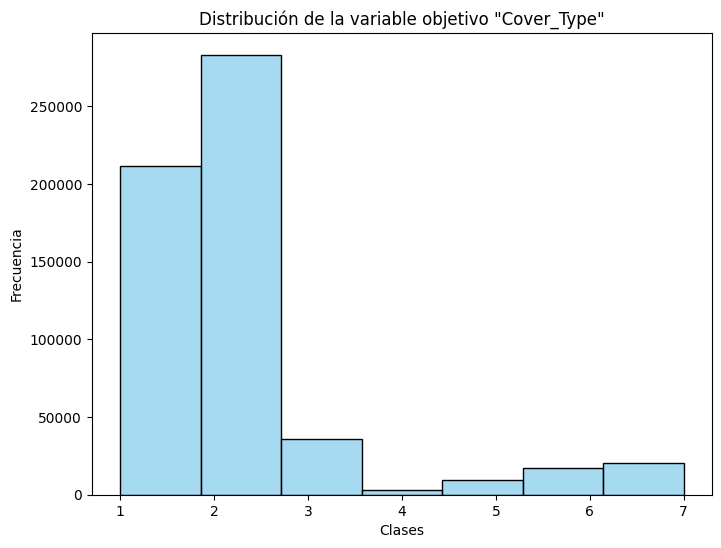

Numero de instancias por clase:
 Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


In [10]:
#Mostramos el diagrama de distribución de la variable objetivo
plt.figure(figsize=(8, 6))

# Histograma para la variable objetivo
sns.histplot(data=df_target['Cover_Type'], kde=False, bins=len(df_target['Cover_Type'].unique()), color='skyblue')
plt.title('Distribución de la variable objetivo "Cover_Type"')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')

plt.show()

#Mostramos el numero de instancias por cada clase
print("Numero de instancias por clase:\n",df_target['Cover_Type'].value_counts())

_PON AQUÍ TU RESPUESTA_

Si observamos la gráfica de la distribución de los datos de la variable objetivo *Cover_Type*, presenta una distribución asimétrica a la derecha con un sesgo o concetración de datos mayoritaria a la izquierda (entorno las clases 1 y 2).

Además, si nos fijamos en los estadísticos de los datos de esta variable podemos ver como corroboran esta distribución:


*   Por un lado tenemos la media (**mean**), cuyo valor se encuentra entorno al 2, lo que nos indica que esta es la clase con más frecuencia.
*   Una desviación estándar (**std**) de 1.3965, nos indica que los datos se encuentran dispersos.
*   Si nos fijamos en los percetiles, podemos observar como un cuarto de los datos (25%, primer percentil) pertenece a la clase 1, mientras que al menos el 75% (tercer percentil) de los datos, pertenecen a la clase 2.

El valor de estos estadísticos apoyan la distribución de la gráfica, indicando que las clases mayoritarias son las dos primeras clases y por tanto, hay un evidente desbalanceo en los datos. Por lo tanto, sería aconsejable realizar en una fase de preprocesamiento un rebalanceo de los datos, para así evitar el sesgo.

Por último, también podemos ver la cantidad de instancias que pertenecen a cada clase, resaltando las dos primeras clases en cuanto a cantidad.






### **¿Existen valores nulos o perdidos en el dataset?**

In [11]:
## PON AQUÍ TU CÓDIGO

#Primero vemos las dimensiones de los dos datasets que tenemos
print("Dimensión características: ",df_features.shape)
print("Dimensión target: ",df_target.shape)

#Combinamos los dataset de features y target para un mejor tratamiento de ambos
df = pd.concat([df_features, df_target], axis=1)
print("Dimensión dataset combinado: ", df.shape)

Dimensión características:  (581012, 12)
Dimensión target:  (581012, 1)
Dimensión dataset combinado:  (581012, 13)


In [12]:
#Calculamos el numero de valores nulos del dataset total
print("El número de valores nulos en el dataset es: ", df.isnull().sum().sum())

#Numero de filas vacias
filas_vacias = df.isnull().all(axis=1).sum()
print("El número de filas vacías completas es: ", filas_vacias)

#Valores nulos del dataset por columnas
print("El número de valores nulos por columnas es: ")
df.isnull().sum()

El número de valores nulos en el dataset es:  0
El número de filas vacías completas es:  0
El número de valores nulos por columnas es: 


,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


_PON AQUÍ TU RESPUESTA_

Podemos ver en la salida por pantalla que no hay ninguna variable con valores nulos. Para su calculo, se ha utilizado la función *.isnull().sum()*. Además, se ha unificado el dataset de las características y de la variable objetivo para un mejor procesamiento y aplicación de las diferentes técnicas en los ejercicios posteriores. Para ello se ha utilizado la función *concat*.

### **¿Existe alguna variable altamente correlacionada con la variable de clase?**

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamos filtar aquellas correlaciones superiores al 0.80 con la variable de clase.

In [13]:
## PON AQUÍ TU CÓDIGO
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Variables continuas: cont_vars
# Variables categóricas: cat_vars
# Variable de clase: target

# Listas de variables
cont_vars = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
cat_vars = ['Soil_Type', 'Wilderness_Area']
target = 'Cover_Type'

# Función para Cramér's V
def cramers_v(cat1, cat2):
    contingency_table = pd.crosstab(cat1, cat2)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Función para Eta²
def eta_squared(x, y):
    groups = [y[x == val] for val in np.unique(x)]
    return sum(len(group) * (group.mean() - y.mean())**2 for group in groups) / sum((y - y.mean())**2)



# Calculamos las correlaciones continuas vs objetivo
le = LabelEncoder()
df['objective_encoded'] = le.fit_transform(df[target]) #codificamos la variable objetivo

correlations = []

# Continuas vs objetivo
for cont in cont_vars:
    eta2 = eta_squared(df['objective_encoded'], df[cont])
    correlations.append({'variable': cont, 'correlation': eta2})

# Categóricas vs objetivo
for cat in cat_vars:
    corr = cramers_v(df[cat], df[target])
    correlations.append({'variable': cat, 'correlation': corr})

# Convertimos a DataFrame para filtrar
correlation_df = (pd.DataFrame(correlations)).sort_values(by='correlation', ascending=False)
print("El dataframe de correlaciones con la variable objetivo es:\n", correlation_df)

# Filtramos las correlaciones mayores a 0.80
high_corr = correlation_df[correlation_df['correlation'] > 0.80]

# Mostramos los  resultados
print("\nVariables con correlación superior a 0.80 con la variable objetivo:")
print(high_corr)



El dataframe de correlaciones con la variable objetivo es:
                               variable  correlation
0                            Elevation     0.615952
10                           Soil_Type     0.467605
11                     Wilderness_Area     0.443242
5      Horizontal_Distance_To_Roadways     0.095937
2                                Slope     0.074213
9   Horizontal_Distance_To_Fire_Points     0.069763
6                        Hillshade_9am     0.032299
7                       Hillshade_Noon     0.029276
3     Horizontal_Distance_To_Hydrology     0.023840
4       Vertical_Distance_To_Hydrology     0.012294
8                        Hillshade_3pm     0.010648
1                               Aspect     0.004592

Variables con correlación superior a 0.80 con la variable objetivo:
Empty DataFrame
Columns: [variable, correlation]
Index: []


Para poder calcular la correlación entre las variables con la variable objetivo se han utilizado diferentes técnicas, ya que tenemos diferentes tipos de variables (continuas y categóricas).

Para calcular la ***correlación de las variables continuas con la variable objetivo*** se ha utilizado el método **Eta²**. Este se utiliza para medir la relación entre una *variable categórica y una variable continua*. En este caso, la variable objetivo se codifica numéricamente utilizando un *LabelEncoder*.
Se calcula de la siguiente manera:
*   Se agrupan los valores de la variable continua según las categorías de la variable objetivo.
*   Se mide la proporción de la varianza total explicada por las diferencias entre los grupos.

Una vez calculado, un valor cercano a 0 indica una baja correlación, mientras que un valor cercano a 1 indica una alta correlación. Este método es muy útil porque permite evaluar cómo varía una característica continua según las categorías de la variable objetivo.

Por otro lado, para calcular la ***correlación entre variables categóricas con la variable objetivo***, se ha utilizado el método **Cramér's V**. Este método es una medida de asociación basada en el **estadístico chi-cuadrado**, diseñada para analizar la relación entre dos variables categóricas. Se calcula de la siguiente manera:
*   Se construye una tabla de contingencia entre las dos variables categóricas.
*   Se calcula el estadístico chi-cuadrado y se normaliza para obtener un valor entre 0 y 1.

Una vez calculado, un valor cercano a 0 indica poca asociación entre las variables, mientras que, un valor cercano a 1 indica una fuerte asociación.Este método es útil para evaluar la relación entre variables categóricas, ya que tiene en cuenta la estructura de las categorías y el tamaño de las muestras.

Finalmente se han juntado las correlaciones hayadas por cada método en un dataframe y se han mostrado en forma descendente para así poder ver las variables con más correlación con la variable objetivo. Además también se ha calculado las variables que puedan tener una correlación mayor a 0.8 con la variable, lo cuál, como podemos ver en la salida no hay ninguna, ya que la correlación más alta es de un valor de 0.615952, correspondiente a la variable *Elevation*.

## **¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.**

In [14]:
#Mostramos las 3 variables que poseen mayor correlación con la variable objetivo
correlation_df.head(3)

,variable,correlation
0,Elevation,0.615952
10,Soil_Type,0.467605
11,Wilderness_Area,0.443242


_PON AQUÍ TU RESPUESTA_

Si nos fijamos en la ejecución de la anterior pregunta, se puede ver que al calcular la correlación por los diferentes métodos (para categóricas o continuas), las tres variables más correlacionadas con la variables objetivo son: *Elevation, Soil_Type* y *Wilderness_Area.*


     

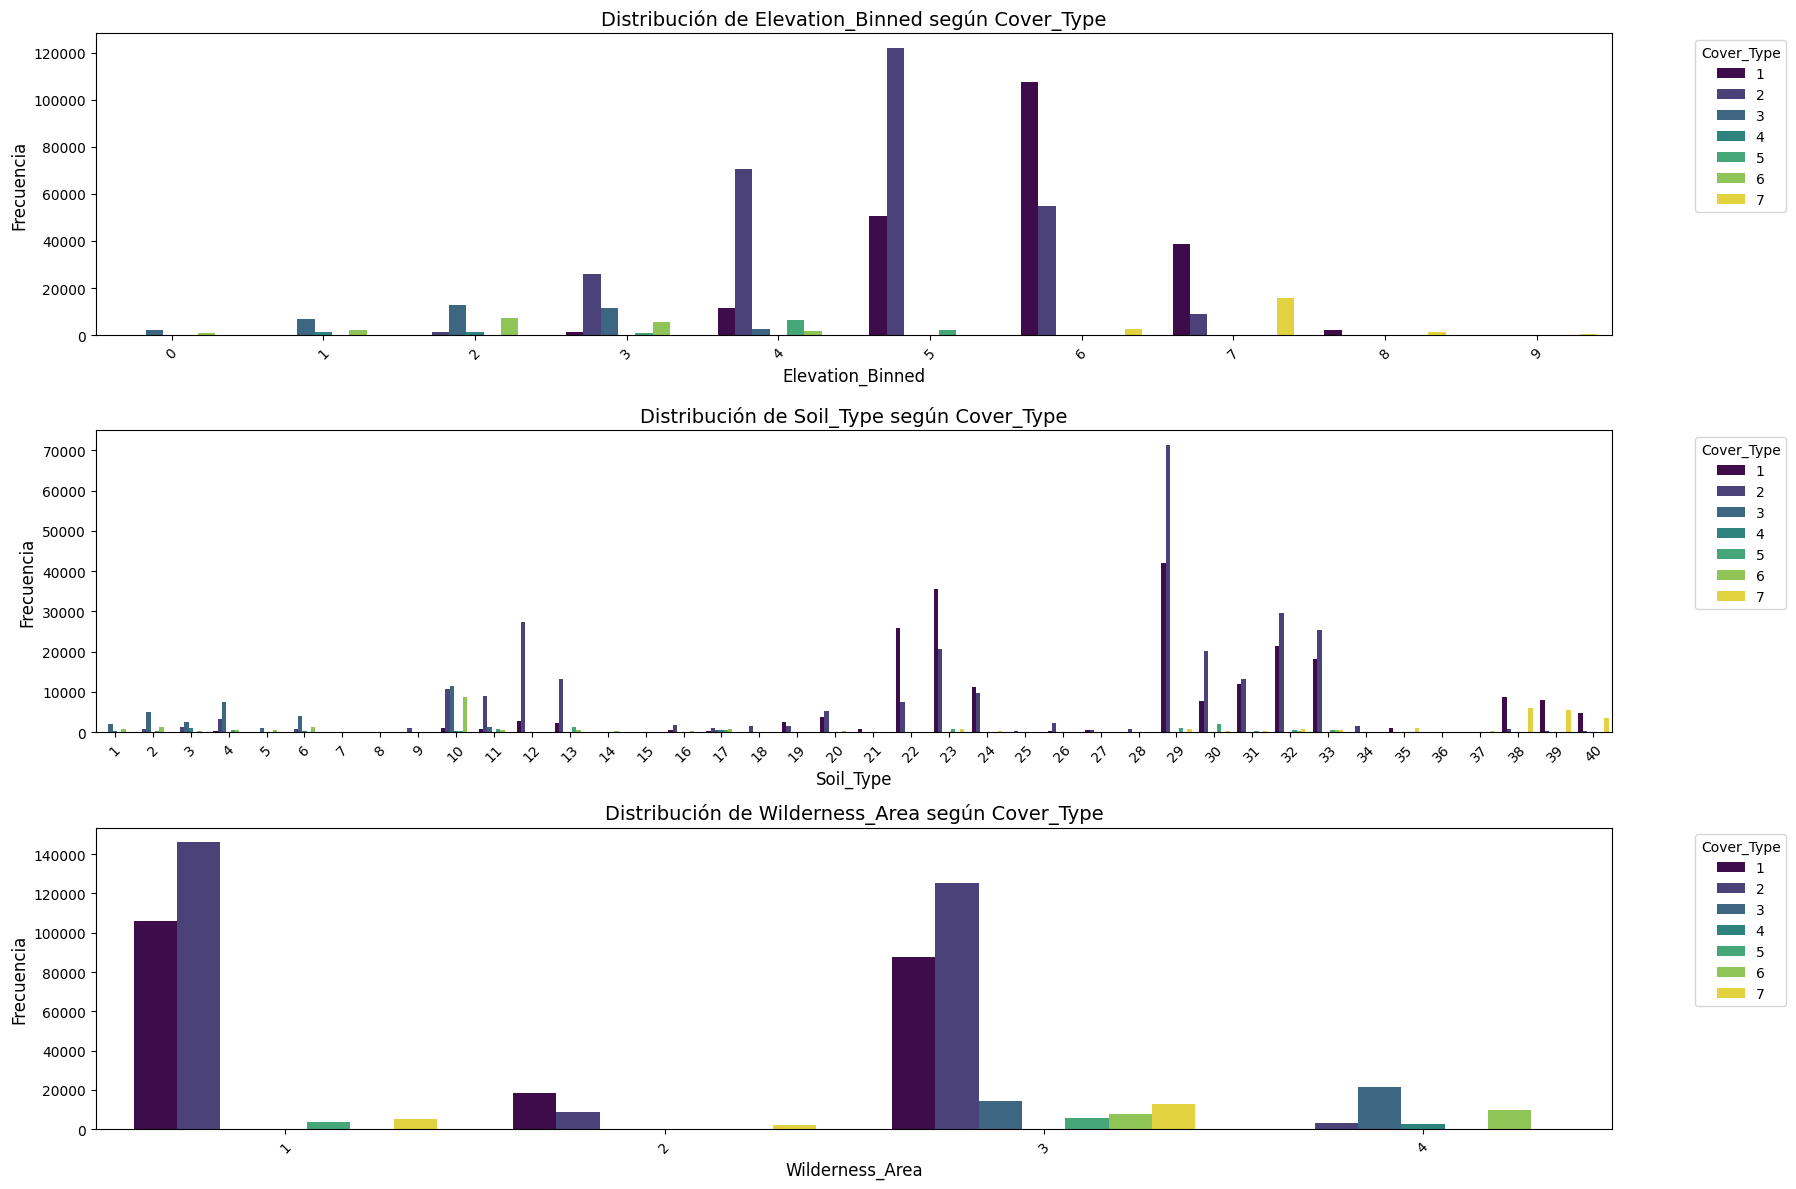

In [15]:
# Discretizamos la variable Elevation
df['Elevation_Binned'] = pd.cut(df['Elevation'], bins=10, labels=False)

# Lista de variables más correlacionadas
variables = [ 'Elevation_Binned', 'Soil_Type', 'Wilderness_Area']

# Creación de los gráficos para ver la relación de las variables más correlacionadas con la variable objetivo
plt.figure(figsize=(18, 12))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 1, i)  # 3 filas, 1 columna, índice i
    sns.countplot(data=df, x=var, hue="Cover_Type", palette="viridis")
    plt.title(f"Distribución de {var} según Cover_Type", fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.legend(title="Cover_Type", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Para poder demostrar esta hipótesis, ya se hizo como tal la correlación entre todas las variables y la objetivo, por lo que se ve de forma clara que son esas tres las variables más correlacionadas.

Por otro lado, se ha querido realizar unos gráficos para comprobar por cada una de las variables más correlacionadas, que tan relacionadas se encuentra con las diferentes categorías de la variable objetivo:

*   **Elevation (variable continua)**: esta variable muestra una correlación de 0.615952, lo que la hace la variable más correlacionada del dataset. Cabe destacar, que respecto a las otras dos variables más correlacionadas, esta es una variable continua, por lo que fue necesario discretizar la variable para poder ver su visualización. Si observamos su gráfico de barras, podemos observar que de las 9 categorías que posee la clase al ser discretizada, vemos como en algunas (sobretodo en las categorías 4,5,6) predominan de manera significativa las clases 1 y 2 de la variable objetivo. Además, como se mencionó anteriormente, se pudo ver de forma clara como existía una frecuencia muy alta en las categorías 1 y 2 de dicha clase, respecto a las otras 5.

*   **Soil_Type (variable categórica)**: esta variable muestra una correlación de 0.467605, lo que la hace la segunda variable más correlacionada del dataset. Si observamos su gráfico de barras, podemos observar que de las 40 categorías que posee la clase, vemos como en algunas predominan de manera significativa las clases 1 y 2 de la variable objetivo. Además, como se mencionó anteriormente, se pudo ver de forma clara como existía una frecuencia muy alta en las categorías 1 y 2 de dicha clase, respecto a las otras 5.
*   **Wilderness_Area (variable categórica)**: esta variable muestra una correlación de 0.443242, lo que la hace la tercera variable más correlacionada del dataset. Si observamos su gráfico de barras, podemos observar que de las 4 categorías que posee la clase, vemos como en algunas (sobretodo en las categorías 1 y 3) predominan de manera significativa las clases 1 y 2 de la variable objetivo. Además, como se mencionó anteriormente, se pudo ver de forma clara como existía una frecuencia muy alta en las categorías 1 y 2 de dicha clase, respecto a las otras 5.






In [16]:
#Borramos las columnas que agregamos al dataframe en el momento de la correlación y para mostrar la relacion de las variables correlacionadas con la variable objetivo
df = df.drop(columns='Elevation_Binned')
df = df.drop(columns='objective_encoded')
df.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness_Area,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,29,1,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,29,1,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,12,1,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,30,1,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,29,1,5


In [17]:
df.shape

(581012, 13)

Una vez finalizado el EDA, se han borrado la columna creada para codificar la variable objetivo, a la hora de realizar la correlación entre las variables características y la variable objetivo, así como la variable utilizada para discretizar la variable *Elevation* para mostrar su gráfica como una de las más correlacionadas con la variable objetivo. De esta forma, volvemos a tener las 12 características que conforman el dataset, junto con la variable objetivo, haciendo un total de 13 columnas.

#**Clasificación**

In [18]:
# Separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## **Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

- **n_estimators:** define el número de árboles de decisión que se construirán en el bosque aleatorio. Es de tipo entero y tiene un valor predeterminado de 100. Un mayor número de árboles puede mejorar el rendimiento del modelo al reducir el sobreajuste, pero también aumenta el tiempo de entrenamiento y predicción.
- **criterion:** criterio utilizado para medir la calidad de una división en los árboles. Determina cómo seleccionar la mejor división en cada nodo durante la construcción del árbol. Es de tipo *str* y tiene varios posibles valores:
  *   *ginie:* Utiliza la impureza de Gini (valor predeterminado).
  *   *entropy*:  Utiliza la ganancia de información basada en la entropía.
  *   *log_loss*: Similar a "entropy", pero en términos de pérdida logarítmica.
Cambiar este criterio puede afectar la forma en que se generan los árboles y, en consecuencia, el rendimiento del modelo. La elección depende de los datos y del problema.
- **max_depth:** controla la profundidad máxima permitida para los árboles en el bosque. Un árbol más profundo puede modelar datos más complejos, pero corre el riesgo de sobreajustarse. Es de tipo entero, de forma predeterminada tiene el valor *None* (si no se especifica, los árboles crecen hasta que todas las hojas son puras o contienen menos de min_samples_split muestras). Por otro lado, el efecto que tiene es que una profundidad menor puede reducir el sobreajuste y mejorar la generalización, mientras que, una mayor profundidad permite al modelo capturar más detalles, pero aumenta el riesgo de sobreajuste.
- **min_samples_split:** número mínimo de muestras necesarias para dividir un nodo interno en el árbol. Es de tipo entero (*int*) o *float*. Si es un entero, representa el número absoluto de muestras, mientras que si es un flotante (entre 0.0 y 1.0), representa la fracción mínima del conjunto de datos. Su valor predeterminado es 2. Un valor mayor evitará que los nodos se dividan con demasiada facilidad, haciendo que los árboles sean más simples y reduciendo el riesgo de sobreajuste.
- **min_samples_leaf:** número mínimo de muestras que debe contener un nodo hoja. Asegura que las divisiones no generen nodos con muy pocas muestras.
Su tipo es igual que en el caso de *min_samples_split*, aunque tiene como valor predeterminado 1. Tiene como efecto, que Valores mayores pueden suavizar el modelo al evitar divisiones en nodos que contengan muy pocos datos, mientras que valores más bajos permiten árboles más complejos, con el riesgo de sobreajuste.
- **max_features:** número máximo de características consideradas al buscar la mejor división en un nodo. Puede tener los siguientes valores:

  * *sqrt*: Se seleccionan la raíz cuadrada del número total de características. Es el valor predeterminado para la clasificación (valor predeterminado).
  * *log2*: Se seleccionan el logaritmo base 2 del número total de características.
  * *int*: Un número absoluto de características a considerar.
  * *float*: Una fracción del total de características.
  * *None*: Considera todas las características.

  Tiene como efecto limitar las características por división puede reducir el tiempo de entrenamiento y la varianza, pero un valor muy bajo puede limitar la capacidad del modelo para capturar patrones relevantes.





Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

Este parámetro se refiere a la asignación de pesos específicos a las clases en función de su frecuencia en los datos. Este parámetro es útil para abordar el desbalanceo de clases.

Si se le pasa un diccionario o una lista de diccionarios, puedes asignar un peso específico a cada clase.  Además tiene dos modos de uso:



*   **balanced:** scikit-learn ajusta automáticamente los pesos de las clases en función de su frecuencia en los datos. En este caso, las clases minoritarias o poco frecuentes tendrán un peso mayor para que el modelo preste más atención a ellas.

*   **balanced_subsample:** el cálculo de los pesos se realiza tomando muestras de bootstrap para cada árbol, lo que permite ajustar los pesos dinámicamente durante la construcción de los árboles.

Como ya se comentó, puede ser útil para el manejo del desbalanceo de los datos, para mejorar el redimiento de estas clases minoritarias, para realizar un entrenamiento robusto o para problemas de multilabel/multi-output



### **Balancamos el dataset para los datos de train**

In [19]:
## PON AQUÍ TU RESPUESTA Y/O CÓDIGO

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Oversampling con SMOTE
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Undersampling
undersampler = RandomUnderSampler(random_state=1)
X_under, y_under = undersampler.fit_resample(X_train, y_train)

# SMOTE + ENN (combinado)
smoteenn = SMOTEENN(random_state=1)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Mostramos tamaños después del balanceo
print("Tamaño original:", X_train.shape, y_train.shape)
print("Tamaño tras SMOTE:", X_smote.shape, y_smote.shape)
print("Tamaño tras Undersampling:", X_under.shape, y_under.shape)
print("Tamaño tras SMOTE + ENN:", X_smoteenn.shape, y_smoteenn.shape)

Tamaño original: (464809, 12) (464809,)
Tamaño tras SMOTE: (1586893, 12) (1586893,)
Tamaño tras Undersampling: (15407, 12) (15407,)
Tamaño tras SMOTE + ENN: (1553950, 12) (1553950,)


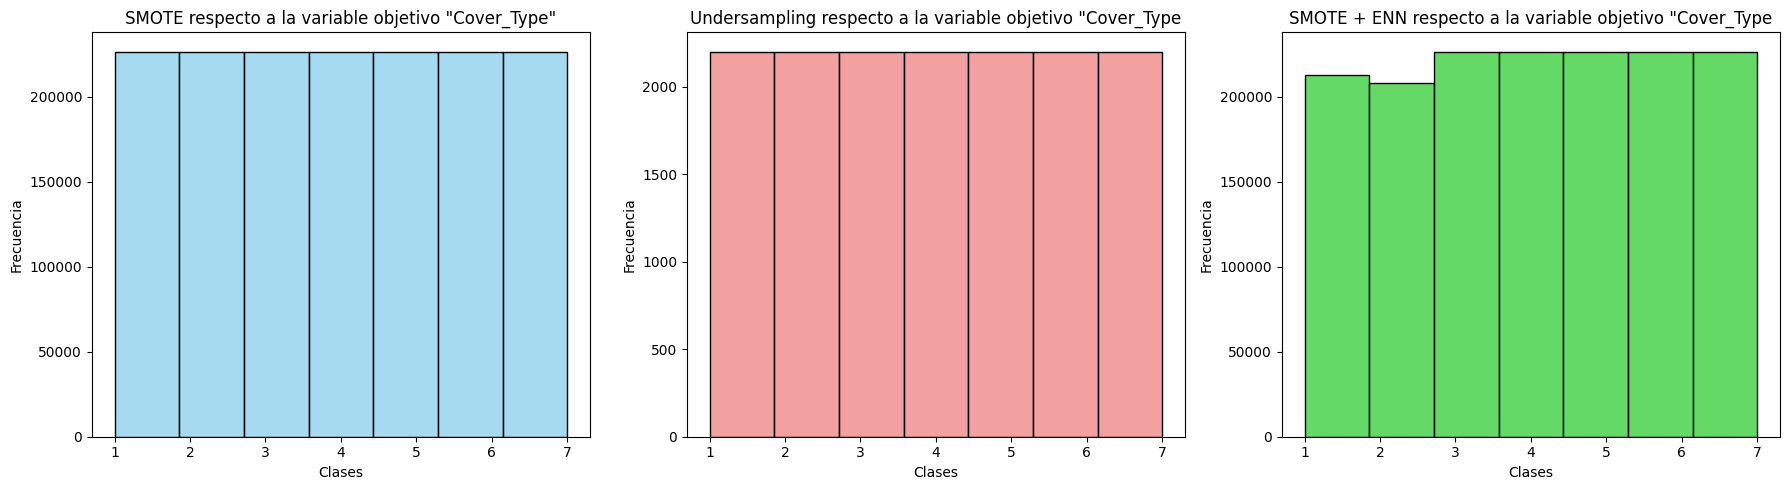

In [20]:
#VERIFICAMOS EL BALANCEO CON LA DISTRIBUCIÓN

# Creamos una figura con tres subgráficos
plt.figure(figsize=(18, 5))

# SMOTE
plt.subplot(1, 3, 1)
sns.histplot(data=y_smote, kde=False, bins=len(y_smote.unique()), color='skyblue')
plt.title('SMOTE respecto a la variable objetivo "Cover_Type"')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')

# Undersampling
plt.subplot(1, 3, 2)
sns.histplot(data=y_under, kde=False, bins=len(y_under.unique()), color='lightcoral')
plt.title('Undersampling respecto a la variable objetivo "Cover_Type')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')

# SMOTE + ENN
plt.subplot(1, 3, 3)
sns.histplot(data=y_smoteenn, kde=False, bins=len(y_smoteenn.unique()), color='limegreen')
plt.title('SMOTE + ENN respecto a la variable objetivo "Cover_Type')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')

# Ajustamos el espacio entre los subgráficos
plt.tight_layout()
plt.show()


Como ya se comentó en el EDA a la hora de ver las distribuciones de la variable objetivo, los datos se encontraban muy balanceados por lo que se aconsejaba realizar un rebalanceo de los datos para así poder evitar sesgos en entrenamientos y predicciones futuras.

Para poder rebalancear el dataset se han aplicado 3 técnicas:
*   **Oversampling (SMOTE)**: es una técnica de sobremuestreo que consiste en generar nuevas muestras sintéticas de las clases minoritarias. En lugar de simplemente duplicar ejemplos existentes, SMOTE utiliza interpolación entre ejemplos reales cercanos de las clases minoritarias para crear nuevos puntos de datos.
  *   **Ventaja principal**: Aumenta el tamaño de la clase minoritaria, permitiendo que los modelos aprendan patrones de esa clase de manera más efectiva.
  *   **Desventaja**: Al generar datos sintéticos, existe el riesgo de sobreajustar (overfitting) si los datos generados no representan correctamente las relaciones reales en el dataset.
*   **Undersampling**:  consiste en reducir la cantidad de datos en las clases mayoritarias, eliminando ejemplos para igualar el tamaño de las clases minoritarias. Esto se hace al azar o utilizando estrategias más avanzadas.
  *   **Ventaja principal**: Reduce el sesgo causado por las clases mayoritarias y permite entrenar modelos más rápido debido al menor tamaño del dataset.
  *   **Desventaja**: Puede perderse información valiosa al eliminar ejemplos, lo que podría afectar el rendimiento general del modelo.
*   **Oversampling (SMOTE) + Undersampling (ENN)**:
  1.   **SMOTE** primero realiza un sobremuestreo para aumentar las clases minoritarias.
  2.   **ENN** elimina ejemplos ruidosos o redundantes en las clases mayoritarias para mejorar la calidad del dataset. Esto se hace verificando si un ejemplo tiene más vecinos cercanos de otra clase que de la suya propia.
  *   **Ventaja principal**: Mejora el balance del dataset y elimina datos irrelevantes o inconsistentes.
  *   **Desventaja**: Puede ser computacionalmente costoso y requiere un ajuste cuidadoso para evitar eliminar datos útiles.


Aunque la última técnica es la más robusta de todas, podemos ver en la ejecución que de 581012 instancias iniciales, *SMOTE + ENN* genera unas 1553950, duplicando prácticamente el número de instancias originales, de forma similar que la técnia de *Oversampling*. Por tanto, por problemas de capacidad computacional, para poder seguir avanzando con la actividad se ha elegido utilizar la técnica de *Undersampling*, que aunque no sea la mejor ténica, proporciona un número considerablemente menor de instancias y en la muestra de los gráficos de la distribución de la variable objetivo balanceada, se puede ver como cada una de las clases se encuentran balanceadas de manera equitativa.

### **Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?**

Una vez que hemos balanceado el dataset, los primeros pasos para realizar un preprocesamiento antes de crear un clasificador Random Forest ya se han creado.
Los pasos han sido:

- Decodificar las variables por One Hot Encoding en el apartado de EDA
- Balancear el dataset para el conjunto de Train, en este caso aplicando la técnica de Undersampling.

Para el caso del clasificador Random Forest, no sería necesario normalizar, ya que este algoritmo no se ve afectado por las escalas de las variables. Random Forest es un modelo basado en árboles de decisión, los cuales funcionan dividiendo los datos en base a umbrales de las características. Esto significa que la magnitud o escala de las variables no influye en la división, a diferencia de otros algoritmos como SVM o KNN que sí son sensibles a las escalas de los datos.

Por lo tanto, con los pasos realizados anteriormente, el dataset está listo para ser utilizado directamente en el entrenamiento del modelo Random Forest.

### **Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.**

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [21]:
# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.ensemble import RandomForestClassifier

n_arboles = [5, 10, 20, 50, 100]
particion = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_feature = None

randomForest = [RandomForestClassifier(n_estimators = i, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None, random_state=1) for i in n_arboles]


In [22]:
# PON AQUÍ TU CÓDIGO PARA EL ENTRENAMIENTO
resultados_rf = []

# Entrenamos y añadimos cada modelo entrenado al array
for i, rf in enumerate(randomForest):
    # Entrenamos el modelo
    rf.fit(X_under, y_under)

    # Guardamos el modelo entrenado en la lista
    resultados_rf.append(rf)
    print(f"Modelo con {rf.n_estimators} árboles entrenado.")

# Mostramos un mensaje de confirmación
print("\nTodos los modelos han sido entrenados y guardados en la lista 'resultados_rf'.")


Modelo con 5 árboles entrenado.
Modelo con 10 árboles entrenado.
Modelo con 20 árboles entrenado.
Modelo con 50 árboles entrenado.
Modelo con 100 árboles entrenado.

Todos los modelos han sido entrenados y guardados en la lista 'resultados_rf'.


### **Cálculo de la importancia**

In [23]:
# Obtenemos la importancia de las variables para cada modelo entrenado
for i, rf in enumerate(resultados_rf):
    # Extraemos las importancias de las características
    importancias = rf.feature_importances_

    # Creamos un DataFrame para  su visualización
    importancia_df = pd.DataFrame({
        'Variable': X_under.columns,  # Nombres de las variables
        'Importancia': importancias
    }).sort_values(by='Importancia', ascending=False)  # Ordenamos de mayor a menor

    # Mostramos los resultados
    print(f"Importancia de las variables para el modelo con {rf.n_estimators} árboles:")
    print(importancia_df)
    print("\n")

Importancia de las variables para el modelo con 5 árboles:
                              Variable  Importancia
0                            Elevation     0.469360
10                           Soil_Type     0.134563
9   Horizontal_Distance_To_Fire_Points     0.074917
5      Horizontal_Distance_To_Roadways     0.072464
6                        Hillshade_9am     0.064431
3     Horizontal_Distance_To_Hydrology     0.047759
1                               Aspect     0.038959
11                     Wilderness_Area     0.031052
4       Vertical_Distance_To_Hydrology     0.025498
7                       Hillshade_Noon     0.018043
8                        Hillshade_3pm     0.011891
2                                Slope     0.011063


Importancia de las variables para el modelo con 10 árboles:
                              Variable  Importancia
0                            Elevation     0.456424
10                           Soil_Type     0.148139
9   Horizontal_Distance_To_Fire_Points     0.07

Una vez entrenados los modelos del algoritmo Random Forest, se ha calculado la importacia de las variables en cada modelo entrenado con un numero determinado de árboles.

Con el cálculo de este parámetro se puede observar la relevancia que tiene cada variable en la predicción del modelo. Este análisis no solo ayuda a identificar las características más influyentes, sino que también permite establecer una conexión entre la importancia de las variables y su correlación con la variable objetivo. Además, en algunos casos, este análisis facilita la simplificación del modelo eliminando variables que aportan poca información.


En los resultados obtenidos, se puede destacar lo siguiente:

- **Elevation** es consistentemente la variable más importante en todos los modelos entrenados, mostrando una importancia alrededor del 45-47%. Esto refleja su fuerte correlación con la variable objetivo y su alta capacidad para influir en la clasificación del modelo.

- **Soil_Type y Horizontal_Distance_To_Fire_Points** ocupan el segundo y tercer lugar en importancia en la mayoría de los casos, con valores que oscilan entre el 13-15% y el 7-8%, respectivamente. Esto sugiere que estas variables también poseen una correlación significativa con la variable objetivo, lo que las hace relevantes para las predicciones. Aquí se puede comprobar como la variable de **Wilderness_Area**, ya no sería la tercera variable más correlacionada.

- Variables como **Hillshade_9am, Horizontal_Distance_To_Roadways, y Horizontal_Distance_To_Hydrology** también tienen una contribución notable, aunque menor, con importancias en el rango del 4-7%.

- Otras variables, como **Slope, Hillshade_3pm, y Vertical_Distance_To_Hydrology**, muestran una baja importancia relativa, con valores inferiores al 3%. Esto sugiere que tienen menor correlación con la variable objetivo y un impacto reducido en las predicciones del modelo.

Este patrón de importancia se mantiene consistente a medida que aumenta el número de árboles en el bosque, lo que refuerza la robustez del modelo y su capacidad para identificar las variables más relevantes en el dataset. Es importante mencionar que el rebalanceo previo de los datos pudo haber influido ligeramente en las importancias observadas, ya que este preprocesamiento garantiza una representación equitativa de todas las clases, resaltando las variables más correlacionadas.

Por tanto, este análisis refuerza que las variables más importantes identificadas por el modelo, como Elevation y Soil_Type, están directamente relacionadas con su alta correlación con la variable objetivo, incluso después de realizar un rebalanceo en el dataset. La interpretación de estas importancias no solo permite entender mejor los datos, sino que también facilita ajustes futuros en el modelo y tareas de selección de características.

### **Visualiza la matriz de confusión del modelo entrenado con 20 árboles.**

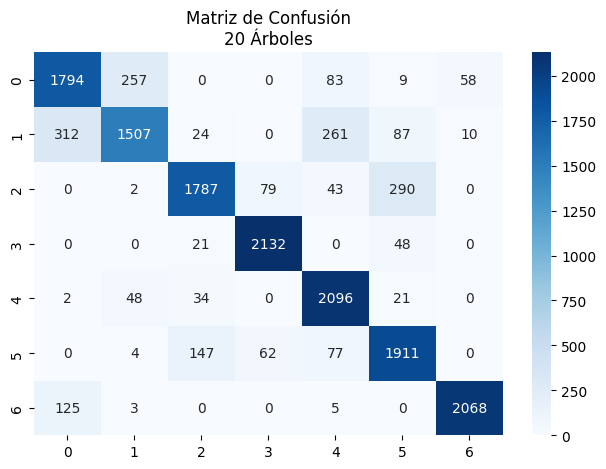

In [24]:
## PON AQUÍ TU CÓDIGO
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm_rf = []
reports_dict_rf = []

#Entrenamos el modelo para el conjunto de train
for i, rf in enumerate(resultados_rf):
  y_pred_train_rf = rf.predict(X_under)
  reports_dict_rf.append(classification_report(y_under, y_pred_train_rf, output_dict=True))
  cm_rf.append(confusion_matrix(y_under, y_pred_train_rf, labels=rf.classes_))
  #print(f"Matriz de confusión para {rf.n_estimators} árboles:")
  #print(cm_rf[i])

#Obtenemos el mapa de calor para 20 árboles
sns.heatmap(cm_rf[2], annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión\n{resultados_rf[2].n_estimators} Árboles')
plt.tight_layout()
plt.show()


### **¿Cuántos ejemplos ha clasificado correctamente?**

In [25]:
#Calculamos los reportes para cada uno de los modelos, pero no en diccionario
reportes_rf = []
for i, model in enumerate(resultados_rf):
    y_pred_train = model.predict(X_under)
    reportes_rf.append(classification_report(y_under, y_pred_train))


print(f"Reporte de clasificación para {n_arboles[2]} árboles:")
print(reportes_rf[2])

Reporte de clasificación para 20 árboles:
              precision    recall  f1-score   support

           1       0.80      0.82      0.81      2201
           2       0.83      0.68      0.75      2201
           3       0.89      0.81      0.85      2201
           4       0.94      0.97      0.95      2201
           5       0.82      0.95      0.88      2201
           6       0.81      0.87      0.84      2201
           7       0.97      0.94      0.95      2201

    accuracy                           0.86     15407
   macro avg       0.86      0.86      0.86     15407
weighted avg       0.86      0.86      0.86     15407



In [26]:
# Número de ejemplos correctamente clasificados (suma de la diagonal) --> TP
correct_predictions_modelo20 = np.trace(cm_rf[2])
print("El numero de ejemplos bien clasificados por el modelo es: ",correct_predictions_modelo20)

El numero de ejemplos bien clasificados por el modelo es:  13295


_PON AQUÍ TU RESPUESTA_

Para poder ver cuantos ejemplos han clasificado correctamente cada uno de los modelos de random forest se ha utilizado la función **classification_report**, que nos proporciona un resumen de cada una de las medidas con las que podemos evaluar como de bien han clasificado cada uno de los modelos.

Como antes de realizar el random forest se ha hecho un balanceo del dataset para el conjunto de datos de train, para poder responder a esta pregunta nos podemos fijar en los valores que nos proporciona el *accuracy* para el modelo de 20 árboles:
*   **Clasificación para 20 árboles:** 0.86, ha clasificado bien el 86% de los datos.

Además, para ver específicamente el número de ejemplos clasficados correctamente para el caso de la matriz de de confusión para 20 árboles, se ha calculado el valor de TP, a partir de la misma, donde se puede observar que ha clasificado correctamente 13295 ejemplos.

### **Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?**

In [27]:
print(f"Reporte de clasificación para {n_arboles[2]} árboles:")
print(reportes_rf[2])

Reporte de clasificación para 20 árboles:
              precision    recall  f1-score   support

           1       0.80      0.82      0.81      2201
           2       0.83      0.68      0.75      2201
           3       0.89      0.81      0.85      2201
           4       0.94      0.97      0.95      2201
           5       0.82      0.95      0.88      2201
           6       0.81      0.87      0.84      2201
           7       0.97      0.94      0.95      2201

    accuracy                           0.86     15407
   macro avg       0.86      0.86      0.86     15407
weighted avg       0.86      0.86      0.86     15407



_PON AQUÍ TU RESPUESTA_

En la salida por pantalla podemos visualizar las diferentes métricas y sus valores correspondientes para cada una de las clases de la variable **Cover_Type**.

Para poder responder a la pregunta propuesta, nos vamos a fijar en el valor obtenido por la columna de la métrica *recall* y *precision*, que nos indica el ratio de ejemplos que son verdaderamente positivos y el ratio de ejemplos positivos correctamente clasificados, así como, el balance entre precisión y recall, respectivamente:
*   **Clase 1**: Tiene una precisión de 0.80 y un recall de 0.82, con un f1-score de 0.81. Esto refleja un buen equilibrio entre precisión y recall, indicando que el modelo clasifica correctamente la mayoría de las instancias de esta clase.
*   **Clase 2**: Presenta una precisión de 0.83, pero su recall es más bajo (0.68), con un f1-score de 0.75. Esto sugiere que el modelo es preciso al clasificar instancias de esta clase, pero pierde algunas (falsos negativos).
*   **Clase 3**: Con una precisión de 0.89 y un recall de 0.81 (f1-score: 0.85), esta clase tiene una clasificación bastante equilibrada y destacada por su alto rendimiento.
*   **Clase 4**: Tiene una precisión muy alta (0.94) y un recall aún más elevado (0.97), lo que da un f1-score de 0.95. Es una de las clases mejor clasificadas, con un número muy bajo de falsos negativos y falsos positivos.
*   **Clase 5**: Muestra una precisión de 0.82 y un recall muy alto de 0.95, resultando en un f1-score de 0.88. Esto indica que el modelo detecta correctamente la mayoría de las instancias de esta clase, con una buena precisión.
*   **Clase 6**: Posee una precisión de 0.81 y un recall de 0.87, lo que se traduce en un f1-score de 0.84. Es una clase con un buen rendimiento, aunque ligeramente inferior al de la clase 5.
*   **Clase 7**: Con una precisión de 0.97 y un recall de 0.94 (f1-score: 0.95), esta clase es de las mejor clasificadas, mostrando una alta capacidad para detectar las instancias correctas con una precisión sobresaliente.

Si miramos las medidas globales:
*   **Accuracy:** 0.86, lo que indica que el modelo clasifica correctamente el 86% del total de las instancias.

*   **Macro Avg**:

  *   **Recall**: 0.86, lo que indica que, en promedio, el modelo detecta correctamente una alta proporción de instancias de cada clase.

  *   **Precision**: 0.86, mostrando que el modelo es consistentemente preciso en sus clasificaciones.

*   **Weighted Avg**:

    * **Recall**: Promedios ponderados por el número de instancias de cada clase, con valores similares al accuracy.

Como conclusión , se ha realizado una análisis obtenido de los datos de precisión y recall para cada una de las clases. Para poder concluir que clase clasifica mejor se ha utilizado el valor de la métrica *f1-score*, ya que se combina los valores de *precisión* y *recall*. Por tanto la clase que mejor clasificaría el modelo serían las clases 4 y 7, ambas con un f1-score de 0.95, seguido de la clase 5 (f1-score de 0.88). El análisis confirma que las clases con mayor correlación y representación en los datos tienden a obtener mejores resultados en su clasificación.

### **¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?**

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

In [28]:
#Entrenamos el modelo para el conjunto de test

cm_rf_test = []
reports_dict_test_rf = []

for i, rf in enumerate(resultados_rf):
  y_pred_test_rf = rf.predict(X_test)
  reports_dict_test_rf.append(classification_report(y_test, y_pred_test_rf, output_dict=True))
  cm_rf_test.append(confusion_matrix(y_test, y_pred_test_rf, labels=rf.classes_))
  #print(f"Matriz de confusión para {rf.n_estimators} árboles:")
  #print(cm_rf[i])

In [29]:
## PON AQUÍ TU CÓDIGO Y RESPUESTA
metrics_test = ['precision', 'recall', 'f1-score']

# Calculamos la media de las métricas
mean_metrics = {metric: [report['weighted avg'][metric] for report in reports_dict_test_rf] for metric in metrics_test}
mean_metrics['accuracy'] = [report['accuracy'] for report in reports_dict_test_rf]
mean_metrics['n_arboles'] = n_arboles

mean_metrics_df = pd.DataFrame(mean_metrics).sort_values(by='accuracy', ascending=False)
mean_metrics_df

,precision,recall,f1-score,accuracy,n_arboles
4,0.757178,0.677625,0.699569,0.677625,100
2,0.758588,0.676239,0.699302,0.676239,20
3,0.755906,0.675344,0.697249,0.675344,50
1,0.751790,0.670181,0.692739,0.670181,10
0,0.742400,0.662117,0.683811,0.662117,5


_PON AQUÍ TU RESPUESTA_

Una vez que se ha entrenado los modelos con el conjunto de Test, se ha vuelto a utilizar la función *classification_report* para poder hallar cada una de las métricas para cada uno de los modelos.

Una vez obtenido el diccionario de reportes, se ha elaborado un dataframe que por cada modelo se observen cada una de las métricas (*precision, recall, f1-score y accuracy*), cabe destacar, que las tres primeras métricas se ha cogido el *weighted_avg* del diccionario de reportes, para así tener las métricas medias de cada clase para cada modelo.

Una vez obtenido el dataframe, se ha ordenado según el valor de *accuracy*, entendiendo esta por los valores de precisión por cada modelo (como de bien ha predicho el modelo) y no la propia métrica de *precision*, que es la media de dicha métrica por cada clase para cada modelo. Por lo que el modelo que obtiene mejores resultados en cuanto a precisión (accuracy) es el modelo de 100 árboles, con un valor de 0.677625.



### **Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.**

In [30]:
## PON AQUÍ TU CÓDIGO Y RESPUESTA
mean_metrics_df.sort_values(by='f1-score', ascending=False)

,precision,recall,f1-score,accuracy,n_arboles
4,0.757178,0.677625,0.699569,0.677625,100
2,0.758588,0.676239,0.699302,0.676239,20
3,0.755906,0.675344,0.697249,0.675344,50
1,0.751790,0.670181,0.692739,0.670181,10
0,0.742400,0.662117,0.683811,0.662117,5


Para seleccionar el modelo que obtiene los mejores resultados, nos enfocamos en las métricas **f1-score** y **accuracy**, ya que estas reflejan el equilibrio entre *precisión y recall*, así como el porcentaje de instancias correctamente clasificadas, respectivamente.

El **modelo con 100 árboles** tiene el f1-score más alto (0.699569) y también la mayor accuracy (0.677625), superando a los demás modelos en ambas métricas. Este rendimiento superior sugiere que, al aumentar el número de árboles, el modelo gana mayor capacidad para capturar patrones en los datos sin comprometer la generalización.


Aunque otros modelos tienen métricas cercanas, como el de 20 árboles (f1-score de 0.699302 y accuracy de 0.676239), la diferencia es lo suficientemente clara como para considerar que el modelo de 100 árboles ofrece un mejor balance y una clasificación más precisa en general.

Por lo tanto, seleccionamos el modelo de 100 árboles como el que obtiene mejores resultados en el conjunto de test, ya que maximiza las métricas clave de evaluación.

### **Visualiza la matriz de confusión de los datos de test de este modelo.**
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


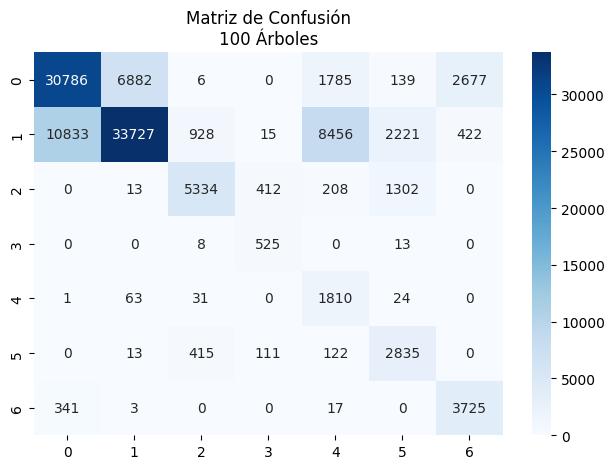

In [31]:
#Obtenemos el mapa de calor para 50 árboles
sns.heatmap(cm_rf_test[4], annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión\n{resultados_rf[4].n_estimators} Árboles')
plt.tight_layout()
plt.show()

In [32]:
# Número de ejemplos correctamente clasificados (suma de la diagonal)
correct_predictions_modelo100 = np.trace(cm_rf_test[4])
print("El numero de ejemplos bien clasificados por el modelo es: ",correct_predictions_modelo100)

# Número de ejemplos incorrectamente clasificados (suma de todo el cm menos la diagonal)
incorrect_predictions_modelo100 = cm_rf_test[4].sum() - correct_predictions_modelo100
print("El numero de ejemplos mal clasificados por el modelo es: ",incorrect_predictions_modelo100)

El numero de ejemplos bien clasificados por el modelo es:  78742
El numero de ejemplos mal clasificados por el modelo es:  37461


Para calcular el número de ejemplos bien y mal clasificados se ha realizado de la siguiente manera:

- **Número de ejemplos bien clasificados**:
En el código, se utiliza *np.trace(cm_rf_test[4])*. Esto se refiere a la suma de los valores de la diagonal principal de la matriz de confusión *cm_rf_test[4]*. La diagonal principal contiene los valores que corresponden a los ejemplos correctamente clasificados. Luego, con *np.trace()*, se suman todos esos valores de la diagonal. En este caso, la salida es 78742, lo que indica que el modelo clasificó correctamente 78742 ejemplos.

- **Número de ejemplos mal clasificados**:
El número de ejemplos mal clasificados se calcula con esta expresión: *cm_rf_test[4].sum() - correct_predictions_modelo100*. Lo que hace este cálculo es obtener la suma total de todos los elementos de la matriz de confusión *cm_rf_test[4]* con *.sum()*. Esta suma incluye tanto los ejemplos bien clasificados (en la diagonal) como los mal clasificados (en el resto de la matriz).
Después, se resta el número de ejemplos bien clasificados (*correct_predictions_modelo100*) de la suma total, lo que da el número de ejemplos mal clasificados. En este caso, el resultado es 37461, lo que significa que el modelo clasificó erróneamente 37461 ejemplos.

### **Visualiza los valores de precision, recall, f1 para cada una de las clases.**
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [33]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

#Calculamos los reportes para cada uno de los modelos, pero no en diccionario
reportes_rf_test = []
for i, model in enumerate(resultados_rf):
    y_pred_test = model.predict(X_test)
    reportes_rf_test.append(classification_report(y_test, y_pred_test))


print(f"Reporte de clasificación para {n_arboles[4]} árboles:")
print(reportes_rf_test[4])

Reporte de clasificación para 100 árboles:
              precision    recall  f1-score   support

           1       0.73      0.73      0.73     42275
           2       0.83      0.60      0.69     56602
           3       0.79      0.73      0.76      7269
           4       0.49      0.96      0.65       546
           5       0.15      0.94      0.25      1929
           6       0.43      0.81      0.57      3496
           7       0.55      0.91      0.68      4086

    accuracy                           0.68    116203
   macro avg       0.57      0.81      0.62    116203
weighted avg       0.76      0.68      0.70    116203



Una vez que hemos obtenido los valores de las métricas para este modelo, vamos a proceder a analizarlas:

*   **Clase 1**: Tiene una precisión de 0.73 y un recall también de 0.73, resultando en un f1-score de 0.73. Esto muestra que el modelo tiene un desempeño sólido y balanceado en la clasificación de esta clase.

*   **Clase 2**: Posee la precisión más alta (0.83), pero el recall es significativamente más bajo (0.60), lo que lleva a un f1-score de 0.69. Esto indica que, aunque el modelo es muy preciso al identificar esta clase, deja muchas instancias sin clasificar correctamente (falsos negativos).

*   **Clase 3**: Muestra un buen balance con una precisión de 0.79 y un recall de 0.73, resultando en un f1-score de 0.76. Esto sugiere que el modelo clasifica esta clase de manera efectiva.

*   **Clase 4**: Tiene una precisión baja (0.49) pero un recall muy alto (0.96), lo que lleva a un f1-score de 0.65. Esto significa que el modelo identifica casi todas las instancias de esta clase, pero comete muchos errores al clasificar otras clases como si fueran de esta.

*   **Clase 5**: Presenta la precisión más baja (0.15), pero un recall extremadamente alto (0.94), lo que lleva a un f1-score de 0.25. Esto indica que el modelo detecta casi todas las instancias de esta clase, pero con una cantidad masiva de falsos positivos.

*   **Clase 6**: Tiene una precisión de 0.43 y un recall de 0.81, con un f1-score de 0.57. Esto indica que el modelo es moderadamente efectivo para esta clase, aunque con un mayor enfoque en capturar la mayoría de las instancias (recall alto).

*   **Clase 7**: Posee una precisión de 0.55 y un recall de 0.91, resultando en un f1-score de 0.68. Esto sugiere que el modelo identifica la mayoría de las instancias de esta clase, aunque con un número considerable de falsos positivos.

En conclusión, el modelo no clasifica de igual manera todas las clases. En general, las clases 1 y 3 tienen un buen balance entre precisión y recall, lo que indica una capacidad predictiva más confiable para estas clases. La clase 2 tiene una precisión muy alta, pero su recall es más bajo, lo que sugiere una alta precisión con algunos falsos negativos. Las clases 4 y 5 muestran un desequilibrio notable, con la clase 5 siendo la menos efectiva en términos de precisión. Por lo tanto, el modelo muestra una mayor capacidad predictiva para la clase 3 en términos de balance entre precisión y recall, ya que tiene un valor de f1-score mayor que el resto de clases.

## **Support Vector Machine**

In [34]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_
*   **C (parámetro de regularización)**: controla la regularización del modelo. Es inversamente proporcional a la fuerza de regularización.
  *   Un valor alto de C significa que el modelo intenta clasificar los datos correctamente con menos tolerancia a los errores, lo que puede llevar a sobreajuste.
  *   Un valor bajo de C permite más errores en la clasificación, resultando en un modelo más regularizado y posiblemente mejor generalización.

  Al ajustar C, se cambia el ancho del margen y cómo el modelo trata los puntos de datos mal clasificados. Un margen más amplio (C bajo) significa más regularización.

*   **kernel**: especifica el tipo de función matemática que se utiliza para transformar los datos en un espacio de mayor dimensión, donde puedan ser separables. Existen varias opciones de kernel:
  *   *linear*: función lineal
  *   *poly*: función polinómica
  *   *rbf* (predeterminado): función de base radial (también conocida como kernel Gaussiano).
  *   *sigmoid*: función sigmoidal.

  La elección del kernel depende de las características del conjunto de datos. Por ejemplo, un kernel polinómico puede ser útil si los datos tienen relaciones no lineales complejas.

*   **degree (grados del kernel polinómico)**: representa el grado del polinomio si se utiliza el kernel *poly*. Se utiliza de la siguiente manera:
  *   Se aplica únicamente cuando el kernel seleccionado es *poly*. No tiene efecto en otros tipos de kernel como *linear*, *rbf* o *sigmoid*.
  *   Un valor más alto indica un polinomio de mayor grado, lo que puede capturar relaciones más complejas, pero también aumenta el riesgo de sobreajuste.

*   **gamma (coeficiente del kernel)**: controla la influencia de un solo punto de datos en los demás para los kernels *rbf*, *poly* y *sigmoid*. Tiene las siguiente opciones:
  *   *scale* (predeterminado): calcula gamma automáticamente como *1/(𝑛features⋅Var(𝑋)*,ajustándose al conjunto de datos.
  *   *auto*: Calcula gamma como *1/𝑛features*.
  *   *Número flotante*: Puedes especificar un valor manualmente, que debe ser positivo.

  Un *gamma bajo* significa que cada punto tiene un alcance más amplio, resultando en límites de decisión más suaves, mientras que un *gamma alto* enfoca la influencia de cada punto de datos en su entorno inmediato, resultando en límites de decisión más complejos, pero con mayor riesgo de sobreajuste.


Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

El hiperparámetro **decision_function_shape** determina cómo se presenta la salida de la función de decisión en problemas de clasificación multiclase.

Este parámetro tiene las siguientes opciones:
*   *ovr* (one-vs-rest, por defecto): La función de decisión tiene forma (𝑛samples,𝑛classes). En este caso, el modelo genera una puntuación por cada clase para cada muestra. Estas puntuaciones representan qué tan probable es que cada muestra pertenezca a una clase específica, basándose en una estrategia "uno contra el resto". Es útil para problemas multiclase porque facilita la interpretación de las probabilidades asociadas a cada clase.
*   *ovo* (one-vs-one): La función de decisión tiene forma (𝑛samples,𝑛classes × (𝑛classes − 1)/2). Aquí, la salida representa la matriz de decisiones del enfoque "uno contra uno", donde cada par de clases se compara en un clasificador binario. Esto resulta en muchas puntuaciones intermedias entre pares de clases. Este enfoque es más detallado en términos de la relación entre las clases, pero puede ser menos intuitivo para usuarios que buscan predicciones directas.

Internamente, Scikit-learn usa 'ovo' para entrenar modelos multiclase, sin importar la configuración de decision_function_shape. El cambio afecta únicamente cómo se presenta la salida de la función de decisión.
Este hiperparámetro se ignora en problemas de clasificación binaria, ya que no se necesita una estrategia especial para manejar múltiples clases.


Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [35]:
df = df.head(100000)

Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

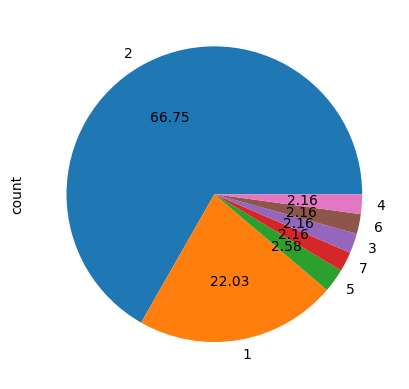

In [36]:
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

Podemos ver de manera evidente que las clases se encuentran desbalanceadas en las 100000 lineas cogidas del dataset por lo que sería recomendable balancear el dataset.

In [37]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)


### **Balanceamos el dataset**

In [38]:
# Oversampling con SMOTE
smote_svm = SMOTE(random_state=1)
X_smote_svm, y_smote_svm = smote_svm.fit_resample(X_train, y_train)

# Undersampling
undersampler_svm = RandomUnderSampler(random_state=1)
X_under_svm, y_under_svm = undersampler_svm.fit_resample(X_train, y_train)

# SMOTE + ENN (combinado)
smoteenn_svm = SMOTEENN(random_state=1)
X_smoteenn_svm, y_smoteenn_svm = smoteenn_svm.fit_resample(X_train, y_train)

# Mostramos tamaños después del balanceo
print("Tamaño original:", X_train.shape, y_train.shape)
print("Tamaño tras SMOTE:", X_smote_svm.shape, y_smote_svm.shape)
print("Tamaño tras Undersampling:", X_under_svm.shape, y_under_svm.shape)
print("Tamaño tras SMOTE + ENN:", X_smoteenn_svm.shape, y_smoteenn_svm.shape)

Tamaño original: (80000, 12) (80000,)
Tamaño tras SMOTE: (374199, 12) (374199,)
Tamaño tras Undersampling: (11970, 12) (11970,)
Tamaño tras SMOTE + ENN: (368853, 12) (368853,)


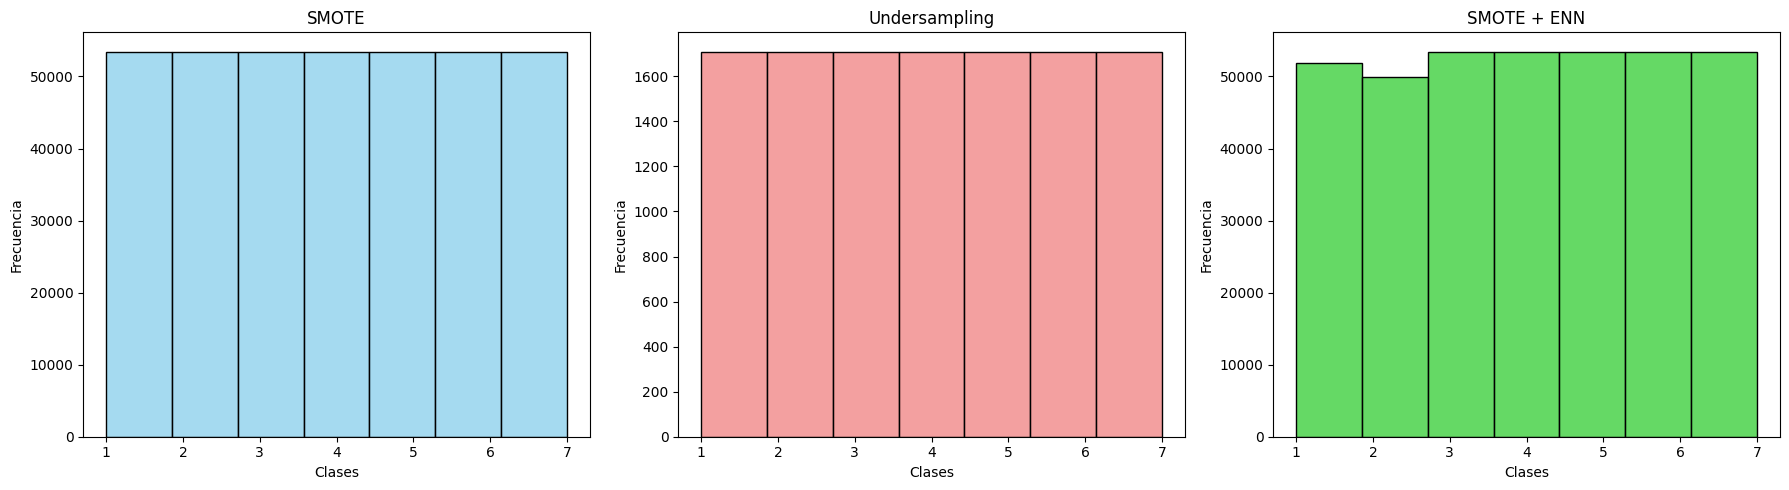

In [39]:
#VERIFICAMOS EL BALANCEO CON LA DISTRIBUCIÓN

# Creamos una figura con tres subgráficos
plt.figure(figsize=(18, 5))

# SMOTE
plt.subplot(1, 3, 1)
sns.histplot(data=y_smote_svm, kde=False, bins=len(y_smote_svm.unique()), color='skyblue')
plt.title('SMOTE')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')

# Undersampling
plt.subplot(1, 3, 2)
sns.histplot(data=y_under_svm, kde=False, bins=len(y_under_svm.unique()), color='lightcoral')
plt.title('Undersampling')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')

# SMOTE + ENN
plt.subplot(1, 3, 3)
sns.histplot(data=y_smoteenn_svm, kde=False, bins=len(y_smoteenn_svm.unique()), color='limegreen')
plt.title('SMOTE + ENN')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')

# Ajustamos el espacio entre los subgráficos
plt.tight_layout()
plt.show()


In [40]:
#Asigmanos a las variables X_train e y_train los conjuntos de undersampling
X_train, y_train = X_under_svm, y_under_svm

Al igual que para el caso de la clasificación con Random Forest, ha sido necesario balancear el dataset. También se ha cogido la técnica de Undersampling, ya que por problemas computacionales al coger algunas de las otras dos técnicas muere el kernel.

### **Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?**

In [41]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## COMPLETAR

# Definimos las columnas continuas y categóricas
continuous_names = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon',
    'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]
categorys_names = ['Soil_Type', 'Wilderness_Area']

# Creamos el preprocesador con escalado y OneHotEncoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_names),  # Escalamos las variables continuas
        ('cat', OneHotEncoder(), categorys_names)     # Aplicamos OneHotEncoding a las variables categóricas
    ]
)

# Creamos el pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Ajustamos el pipeline al conjunto de datos completo X
pipeline.fit(X)

# Transformamos X_train y X_test
X_train = pipeline.transform(X_train)
X_test = pipeline.transform(X_test)


Sí es necesario normalizar los datos antes de utilizar un clasificador SVM, ya que:
* **Los SVM son sensibles la escala de características**: Los SVM utilizan funciones basadas en distancias (como el producto escalar y la distancia euclidiana) para encontrar el hiperplano que separa las clases. Si las variables tienen escalas muy diferentes, aquellas con valores más grandes tendrán un mayor impacto en las distancias, lo que puede afectar negativamente al rendimiento del modelo. Además, algunos tipos de kernel son más sensible que otros a la escala de los datos, destacando el kernel *radial*.

*   **Características continuas**: Se ha escalado las características continuas (Elevation, Aspect, Slope, etc.) utilizando StandardScaler. Este método ajusta los valores para que tengan una media de 0 y una desviación estándar de 1, asegurando que todas las características estén en la misma escala. Esto es crucial para evitar que las variables con mayores valores numéricos dominen el modelo.


*   **Características categóricas**: Las variables categóricas (Soil_Type y Wilderness_Area) se han transformado usando OneHotEncoder, que convierte cada categoría en un vector binario. Estas transformaciones producen valores en la escala [0, 1], los cuales no necesitan normalización adicional, ya que ya están en un rango uniforme.

### **Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.**

In [42]:
from sklearn.svm import SVC

C = [0.1, 1, 10, 100, 1000]
kernel = 'rbf'
gamma = 'scale'

svc_models = [SVC(C=i, kernel=kernel, gamma=gamma, random_state=1) for i in C]
svc_models


[SVC(C=0.1, random_state=1),
 SVC(C=1, random_state=1),
 SVC(C=10, random_state=1),
 SVC(C=100, random_state=1),
 SVC(C=1000, random_state=1)]

In [43]:
### PON AQUÍ TU CÓDIGO

# Entrenamos cada modelo
resultados_svc = []
for model in svc_models:
    model.fit(X_train, y_train)  # Usamos el conjunto de entrenamiento balanceado y normalizado
    resultados_svc.append(model)
    print(f"Modelo entrenado con C={model.C}")

Modelo entrenado con C=0.1
Modelo entrenado con C=1
Modelo entrenado con C=10
Modelo entrenado con C=100
Modelo entrenado con C=1000


In [44]:
# Lista para almacenar los resultados de los scores
scores = []

# Calculamos el score para cada modelo
for model in resultados_svc:
    score = model.score(X_train, y_train)  # Calcula el score del modelo
    scores.append({"Modelo": f"SVC (C={model.C})", "Score": score})  # Guardamos el nombre del modelo y el score

# Convertimos los resultados en un DataFrame
df_scores = pd.DataFrame(scores)

# Mostramos el DataFrame
print(df_scores)

         Modelo     Score
0   SVC (C=0.1)  0.766667
1     SVC (C=1)  0.825731
2    SVC (C=10)  0.881287
3   SVC (C=100)  0.929657
4  SVC (C=1000)  0.965330


Una vez entrenado cada uno de los modelos, se ha calculado su valor **score**, el cual se corresponde con el valor de **accuracy**, que mide la proporción de predicciones correctas hechas por el modelo.

Se puede observar que conforme aumenta el valor de **C**, aumenta este valor, lo que indica que el modelo hace mejores predicciones, sin embargo, debido a este aumento es necesario comprobar en líneas posteriores si los modelos tienden a overfitting, ya que este podría ser un indicio del mismo. Además, SVM es propenso a tener overfitting.

### **Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.**

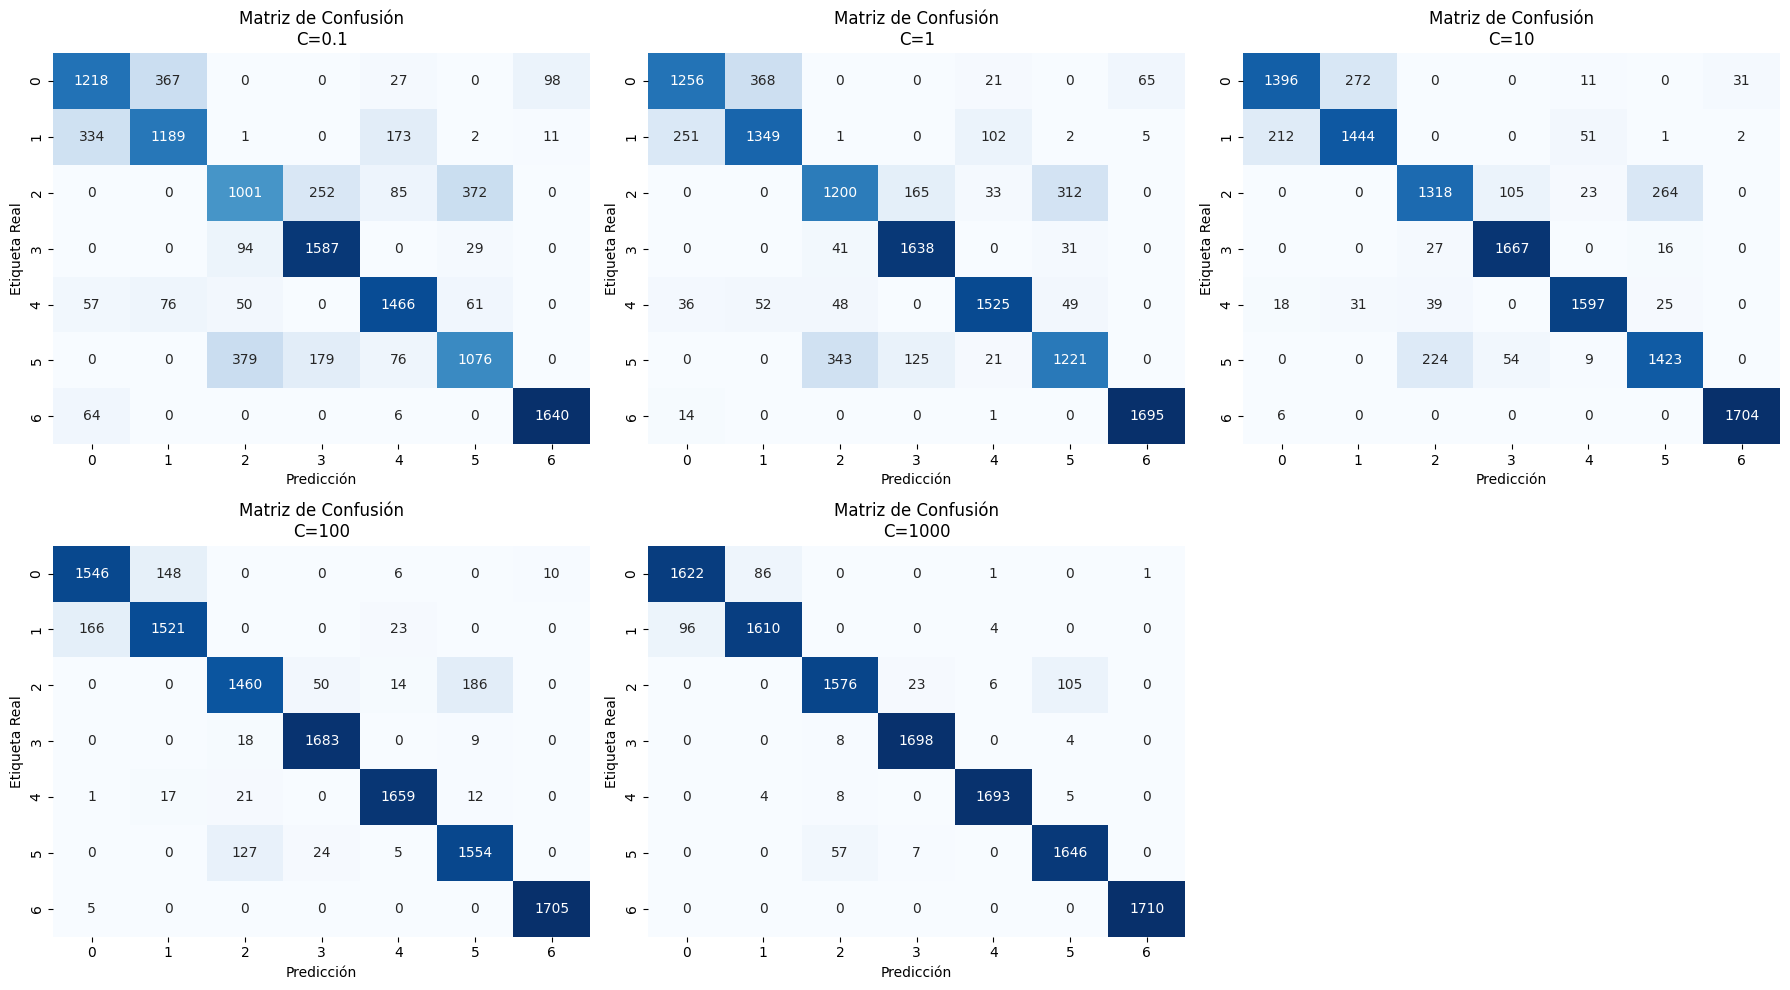

In [45]:
## PON AQUÍ TU CÓDIGO

# Creamos la figura para las matrices de confusión
plt.figure(figsize=(18, 10))

y_pred_train = []
cm_svm_train = []
reports_dict_svm_train = []

# Evaluamos cada modelo y generamos su matriz de confusión
for i, model in enumerate(resultados_svc):

    # Predecimos las etiquetas para el conjunto de entrenamiento
    y_pred_train.append(model.predict(X_train))

    # Creamos la matriz de confusión
    cm_svm_train.append(confusion_matrix(y_train, y_pred_train[i], labels=model.classes_))

    # Almacenamos el diccionario de reporte con las diferentes metricas para cada modelo
    reports_dict_svm_train.append(classification_report(y_train, y_pred_train[i], output_dict=True))

    # Creamos un subplot para cada matriz de confusión
    plt.subplot(2, 3, i + 1)  # Crear una cuadrícula 2x3 (6 espacios, usamos 5)
    sns.heatmap(cm_svm_train[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusión\nC={model.C}')
    plt.xlabel('Predicción')
    plt.ylabel('Etiqueta Real')

# Ajustamos el espacio entre subgráficos
plt.tight_layout()
plt.show()


Al observar cada una de las matrices de confusión, podemos ver que clasifican de forma similar.

### **¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?**

In [46]:
# Creamos la lista para almacenar los resultados
correct_predictions_svm = []

# Recorremos cada una de las matrices de confusión para cada valor de C posible
for i, cm in enumerate(cm_svm_train):
    # Número de ejemplos correctamente clasificados (suma de la diagonal) --> TP
    correct = np.trace(cm)
    correct_predictions_svm.append(correct)

    # Imprimimos los resultados para cada modelo
    print(f"Modelo con C={svc_models[i].C}:")
    print(f"  Ejemplos bien clasificados (TP): {correct}")


Modelo con C=0.1:
  Ejemplos bien clasificados (TP): 9177
Modelo con C=1:
  Ejemplos bien clasificados (TP): 9884
Modelo con C=10:
  Ejemplos bien clasificados (TP): 10549
Modelo con C=100:
  Ejemplos bien clasificados (TP): 11128
Modelo con C=1000:
  Ejemplos bien clasificados (TP): 11555


_indica aquí tu respuesta_

De la misma forma que pasaba con el valor del **score**, que representaba el valor del **accuracy** para cada modelo, se puede observar como a medida que crece el valor de C, el modelo clasifica correctamente un mayor número de ejemplos.

### **¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.**

In [47]:
## PON AQUÍ TU CÓDIGO Y RESPUESTA
metrics_svm = ['precision', 'recall', 'f1-score']

# Calcular la media de las métricas
metrics_svm = {metric_svm: [report_svm['weighted avg'][metric_svm] for report_svm in reports_dict_svm_train] for metric_svm in metrics_svm}
metrics_svm['accuracy'] = [report_svm['accuracy'] for report_svm in reports_dict_svm_train]
metrics_svm['C'] = C

mean_metrics_df_svm = pd.DataFrame(metrics_svm).sort_values(by='accuracy', ascending=False)
mean_metrics_df_svm

,precision,recall,f1-score,accuracy,C
4,0.965391,0.965330,0.965282,0.965330,1000.0
3,0.929473,0.929657,0.929425,0.929657,100.0
2,0.880423,0.881287,0.880507,0.881287,10.0
1,0.823649,0.825731,0.823777,0.825731,1.0
0,0.762224,0.766667,0.762832,0.766667,0.1


In [48]:
#Obtenemos el valor de las precisiones de cada modelo para cada una de las clases
precision_clases = {clase: [report[str(clase)]['f1-score'] for report in reports_dict_svm_train] for clase in range(1, 8)}
precision_clases_df = pd.DataFrame(precision_clases)
precision_clases_df.index = C
precision_clases_df

,1,2,3,4,5,6,7
0.1,0.720071,0.711550,0.618856,0.851395,0.827547,0.662154,0.948251
1.0,0.768901,0.775510,0.717918,0.900495,0.893642,0.734436,0.975540
10.0,0.835428,0.835406,0.794454,0.942873,0.939136,0.827566,0.988686
100.0,0.901984,0.895760,0.875300,0.970868,0.971027,0.895419,0.995620
1000.0,0.946324,0.944282,0.938375,0.987784,0.991798,0.948703,0.999708


_indica aquí tu respuesta_

Se puede observar que los valores de *precisión* siguen el mismo patrón que se lleva cometando para este clasificador, que es que conforme aumenta el valor de C, aumenta el valor de sus métricas indicando una mejor predicción (accuracy). Por lo que se puede ver el modelo que mejor métricas tiene es el de **C=1000**.

Por otro lado, si observamos como va evolucionando el valor de *f1-score* (combinación de las métricas de precision y recall) a lo largo de las clases para cada modelo, se puede observar que tanto el modelo de C=100 como el modelo de C=1000, poseen valores similares, pero al final el modelo de C=1000 es el que acaba teniendo mejores resultados.

Por tanto, en conclusión, el modelo que mejores resultados muestra en cuanto a la métrica de precisión (accuracy) y del resto de métricas en general sería el de C=1000.

### **Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.**

In [49]:
## PON AQUÍ TU CÓDIGO

#Metricas medias para el conjunto de entrenamiento
mean_metrics_df_svm.sort_values(by='f1-score', ascending=False)

,precision,recall,f1-score,accuracy,C
4,0.965391,0.965330,0.965282,0.965330,1000.0
3,0.929473,0.929657,0.929425,0.929657,100.0
2,0.880423,0.881287,0.880507,0.881287,10.0
1,0.823649,0.825731,0.823777,0.825731,1.0
0,0.762224,0.766667,0.762832,0.766667,0.1


In [50]:
from sklearn.model_selection import cross_validate

# Evaluamos cada modelo usando cross-validation en el conjunto de entrenamiento
cv_results = []

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

for model in svc_models:
    # Realizamos cross-validation con 10 particiones (cv=10) y múltiples métricas
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring, return_train_score=False)
    cv_results.append({
        "C": model.C,
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision_weighted'].mean(),
        "Recall": scores['test_recall_weighted'].mean(),
        "F1-Score": scores['test_f1_weighted'].mean(),
    })

# Convertir los resultados a DataFrame para analizarlos
df_cv_results = pd.DataFrame(cv_results)

# Mostrar resultados
print("Resultados de cross-validation:")
df_cv_results

Resultados de cross-validation:


,C,Accuracy,Precision,Recall,F1-Score
0,0.1,0.757226,0.753780,0.757226,0.753200
1,1.0,0.808772,0.806899,0.808772,0.806498
2,10.0,0.845948,0.844793,0.845948,0.844596
3,100.0,0.870677,0.870039,0.870677,0.869939
4,1000.0,0.870175,0.870241,0.870175,0.869956


In [51]:
# Creamos un DataFrame vacío con las columnas que queremos observar
final_metrics = pd.DataFrame(columns=[
    'C', 'Train Accuracy', 'CV Accuracy', 'Train F1', 'CV F1'
])

# Añadimos las métricas de cada valor de C
final_metrics['C'] = [0.1, 1.0, 10.0, 100.0, 1000.0]

# Las métricas de Train
final_metrics['Train Accuracy'] = (mean_metrics_df_svm['accuracy'].sort_values(ascending=True)).values
final_metrics['Train F1'] = (mean_metrics_df_svm['f1-score'].sort_values(ascending=True)).values

# Las métricas de Cross-validation
final_metrics['CV Accuracy'] = df_cv_results['Accuracy'].values
final_metrics['CV F1'] = df_cv_results['F1-Score'].values


# Mostramos el DataFrame final
final_metrics.sort_values(by='CV Accuracy', ascending=False)


,C,Train Accuracy,CV Accuracy,Train F1,CV F1
3,100.0,0.929657,0.870677,0.929425,0.869939
4,1000.0,0.965330,0.870175,0.965282,0.869956
2,10.0,0.881287,0.845948,0.880507,0.844596
1,1.0,0.825731,0.808772,0.823777,0.806498
0,0.1,0.766667,0.757226,0.762832,0.753200


El modelo que obtiene mejores resultados es el de **C = 100**, ya que muestra un buen equilibrio entre el rendimiento en el conjunto de entrenamiento y en la validación cruzada. Tiene un CV Accuracy de 0.8707 y un CV F1 de 0.8699, valores altos que indican una buena capacidad de generalización. Aunque el modelo con C = 1000 presenta una mayor precisión en el entrenamiento, no mejora significativamente en la validación cruzada y muestra indicios de sobreajuste. Por lo tanto, el modelo con C = 100 es la mejor opción al ofrecer un rendimiento consistente.

In [52]:
## PON AQUÍ TU CÓDIGO

#Realizamos las predicciones para el conjunto de test
y_pred_test = []
cm_svm_test = []
reports_dict_svm_test = []

# Evaluamos cada modelo y generamos su matriz de confusión
for i, model in enumerate(resultados_svc):

    # Predecimos las etiquetas para el conjunto de entrenamiento
    y_pred_test.append(model.predict(X_test))

    # Creamos la matriz de confusión
    cm_svm_test.append(confusion_matrix(y_test, y_pred_test[i], labels=model.classes_))

    # Almacenamos el diccionario de reporte con las diferentes metricas para cada modelo
    reports_dict_svm_test.append(classification_report(y_test, y_pred_test[i], output_dict=True))

#Ponemos las metricas en un dataframe para mostrarlas
metrics_svm_test = ['precision', 'recall', 'f1-score']

# Calculamos la media de las métricas
metrics_svm_test = {metric_svm_test: [report_svm_test['weighted avg'][metric_svm_test] for report_svm_test in reports_dict_svm_test] for metric_svm_test in metrics_svm_test}
metrics_svm_test['accuracy'] = [report_svm_test['accuracy'] for report_svm_test in reports_dict_svm_test]
metrics_svm_test['C'] = C

mean_metrics_df_svm_test = pd.DataFrame(metrics_svm_test).sort_values(by='accuracy', ascending=False)
mean_metrics_df_svm_test


,precision,recall,f1-score,accuracy,C
4,0.853395,0.81810,0.826015,0.81810,1000.0
3,0.845553,0.81315,0.820838,0.81315,100.0
2,0.832496,0.80280,0.810471,0.80280,10.0
1,0.802764,0.76360,0.774613,0.76360,1.0
0,0.773683,0.69680,0.716977,0.69680,0.1


Una vez elegido el modelo de **C=100**, realizamos las predicciones para el conjunto de Test. En los resultados obtenidos se puede observar como sigue apareciendo el modelo de C=1000 como el que mejores resultados proporciona, pero como ya se comentó, este modelo presenta un posible overfitting.

Aunque la precisión (accuracy), para el modelo de **C=100** disminuyó un poco con respecto al de Train y CV, sigue dando buenos valores en las métricas y por tanto valores consistentes.

### **Visualiza la matriz de confusión de los datos de test.**
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

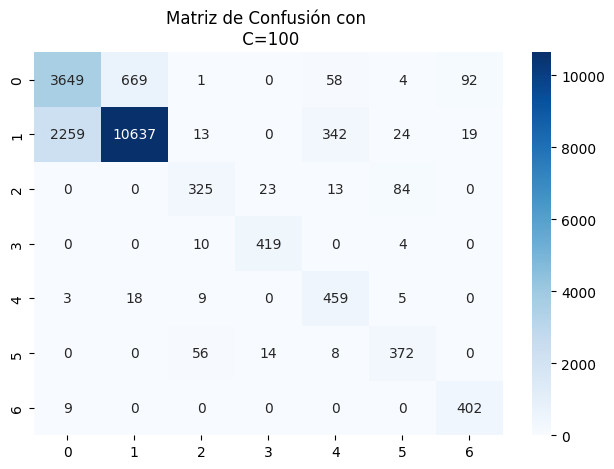

In [53]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
#Obtenemos el mapa de calor para el modelo con C = 100
sns.heatmap(cm_svm_test[3], annot=True, fmt='d', cmap='Blues')
plt.title(f'Matriz de Confusión con \n C={C[3]}')
plt.tight_layout()
plt.show()

In [54]:
# Número de ejemplos correctamente clasificados (suma de la diagonal) --> TP
correct_predictions_svm_test = np.trace(cm_svm_test[3])

# Imprimimos los resultados para cada modelo
print(f"Modelo con C={C[3]}:")
print(f"El numero de ejemplos bien clasificados (TP) es: {correct_predictions_svm_test}")


# Número de ejemplos incorrectamente clasificados (suma de todo el cm menos la diagonal)
incorrect_predictions_svm_test = cm_svm_test[3].sum() - correct_predictions_svm_test
print("El numero de ejemplos mal clasificados por el modelo es: ",incorrect_predictions_svm_test)

Modelo con C=100:
El numero de ejemplos bien clasificados (TP) es: 16263
El numero de ejemplos mal clasificados por el modelo es:  3737


Podemos observar que 16263 ejemplos fueron clasificados correctamente y que 3737 ejemplos fueron clasificados de forma errónea.

### **Visualiza los valores de precision, recall, f1 para cada una de las clases.**
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [55]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

# Seleccionamos el reporte del modelo 3 (índice 3 en la lista)
reporte_modelo_svm = classification_report(y_test, y_pred_test[3], target_names=[str(clase) for clase in resultados_svc[3].classes_])

# Imprimimos el reporte
print(f"Reporte de clasificación para el modelo con C={resultados_svc[3].C}:\n")
print(reporte_modelo_svm)


Reporte de clasificación para el modelo con C=100:

              precision    recall  f1-score   support

           1       0.62      0.82      0.70      4473
           2       0.94      0.80      0.86     13294
           3       0.79      0.73      0.76       445
           4       0.92      0.97      0.94       433
           5       0.52      0.93      0.67       494
           6       0.75      0.83      0.79       450
           7       0.78      0.98      0.87       411

    accuracy                           0.81     20000
   macro avg       0.76      0.86      0.80     20000
weighted avg       0.85      0.81      0.82     20000



Una vez que hemos obtenido los valores de las métricas para este modelo, vamos a proceder a analizarlas:

*   **Clase 1**: Tiene una precisión de 0.62 y un recall de 0.82, resultando en un f1-score de 0.70. Esto indica un desempeño moderado, con una buena capacidad para identificar la mayoría de las instancias de esta clase (alto recall), pero con una tendencia a incluir falsos positivos (baja precisión).

*   **Clase 2**: Posee una precisión muy alta (0.94) y un recall de 0.80, lo que da un f1-score de 0.86. El modelo identifica correctamente la mayoría de las instancias de esta clase con muy pocos falsos positivos, aunque deja escapar algunas instancias verdaderas.

*   **Clase 3**: Tiene una precisión de 0.79 y un recall de 0.73, resultando en un f1-score de 0.76. El rendimiento aquí es moderado, con el modelo siendo más preciso al identificar correctamente las instancias que logra clasificar, aunque no detecta todas las instancias de esta clase.

*   **Clase 4**: Presenta una precisión de 0.92 y un recall de 0.97, con un f1-score de 0.94. El modelo es muy efectivo para esta clase, identificando casi todas las instancias correctas y cometiendo muy pocos errores de clasificación.

*   **Clase 5**: Tiene una precisión baja (0.52) pero un recall muy alto (0.93), lo que da un f1-score de 0.67. El modelo detecta casi todas las instancias de esta clase, pero con muchos falsos positivos, indicando que clasifica erróneamente otras clases como si fueran de esta.

*   **Clase 6**: Posee una precisión de 0.75 y un recall de 0.83, con un f1-score de 0.79. El modelo muestra un buen equilibrio entre precisión y recall en esta clase, con un rendimiento sólido en general.

*   **Clase 7**: Tiene una precisión de 0.78 y un recall muy alto de 0.98, resultando en un f1-score de 0.87. Aunque la precisión es alta, el excelente recall indica que el modelo identifica casi todas las instancias de esta clase, pero podría estar generando algunos falsos positivos.

El modelo no clasifica todas las clases con el mismo nivel de precisión. Las clases 2, 4 y 7 muestran un rendimiento destacado, especialmente la clase 4, con un balance casi perfecto entre precisión y recall. La clase 2 también se destaca por su alta precisión y buen recall. En contraste, las clases 1, 3 y 5 presentan un rendimiento más bajo, siendo la clase 5 la más problemática debido a su baja precisión a pesar de un recall alto. En general, el modelo muestra un buen desempeño, destacando la clasificación para la clase 4.

## **Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

En función de las métricas obtenidas de los dos mejores modelos para **SVM** y **Random Forest**, podemos decir que:

- **Random Forest** con un modelo de *100 árboles* ha tenido:
  - Precisión avg: 0.76
  - Recall avg: 0.68
  - F1-Score avg: 0.70
  - Accuracy: 0.68

- **SVM** con un modelo de *C=100* ha tenido:
  - Precisión avg: 0.85
  - Recall avg: 0.81
  - F1-Score avg: 0.82
  - Accuracy: 0.81

Podemos por tanto decir, en función de estos valores medios y del valor del accuracy, que el clasificador **SVM** nos da mejores resultados en prácticamente todas las métricas observadas, lo que significa que este modelo clasifica mejor y da por tanto unas predicciones más confiables.

#**Investigación**

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

**Introduce aquí la referencia APA del artículo**: Garzón Barrero, J., Sánchez Pineda, N. E., & Londoño Pinilla, D. F. (2023). Evaluación comparativa de los algoritmos de aprendizaje automático Support Vector Machine y Random Forest: efectos del tamaño del conjunto de entrenamiento. Ciencia e Ingeniería Neogranadina, 33(2), 131–148. https://doi.org/10.18359/rcin.6996

**Enlace del artículo**: https://revistas.unimilitar.edu.co/index.php/rcin/article/view/6996

**Título**:  Evaluación comparativa de los algoritmos de aprendizaje automático Support Vector Machine y Random Forest: efectos del tamaño del conjunto de entrenamiento.

**Autores**: Julián Garzón Barrero, Nancy Estela Sánchez Pineda, Darío Fernando Londoño Pinilla.

**Revista**: Ciencia e Ingeniería Neogranadina

**Año de publicación**: 2023

**Objetivo**: *cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.*

- **Objetivo**: El estudio tiene como objetivo evaluar el rendimiento de los algoritmos Support Vector Machine (SVM) y Random Forest (RF) en la clasificación de imágenes satelitales, utilizando un modelo de segmentación basado en objetos (OBIA). Se investiga cómo las variaciones en el tamaño de los conjuntos de entrenamiento y el desequilibrio en las clases de cobertura terrestre afectan la precisión de estos clasificadores.

- **Técnicas de clasificación empleadas y adaptaciones**: Se emplean los algoritmos SVM y RF para la clasificación de imágenes satelitales. El estudio analiza el impacto del tamaño del conjunto de entrenamiento y el desequilibrio de clases en la precisión de los modelos. No se mencionan adaptaciones específicas en la implementación de estas técnicas.

- **Principales resultados de la aplicación y de la investigación**: Los resultados indican que SVM supera consistentemente a RF en términos de precisión general y coeficiente Kappa. Sin embargo, la calibración de ciertos parámetros de SVM en ArcGIS Pro presentó desafíos. La elección del número de árboles en RF resultó ser crucial, ya que un número limitado de árboles (50) afectó la adaptabilidad del modelo, especialmente en conjuntos de datos desequilibrados. El estudio destaca la importancia de considerar cuidadosamente las proporciones de clases y la homogeneidad en las distribuciones de datos para lograr predicciones precisas en la clasificación de uso del suelo y cobertura terrestre.

Este artículo proporciona una comparación detallada entre SVM y RF en la clasificación de imágenes satelitales, ofreciendo información valiosa sobre cómo el tamaño del conjunto de entrenamiento y el equilibrio de clases influyen en el rendimiento de estos algoritmos.